# Breath of the Wild

In [43]:
# call in dependencies
import requests
import json
import pandas as pd
import os
from pyrule_compendium import compendium
from pprint import pprint
import csv
import matplotlib.pyplot as plt
import csv
import numpy as np

In [44]:
comp = compendium()

#pprint(comp.get_all()["equipment"][0]) # get all entries
# print(comp.get_entry("silver lynel")) # get a specific entry with it's name
# pprint(comp.get_entry(380)) #get a specific entry with it's ID
# pprint(comp.get_category("equipment")) # get all entries in a category
# comp.download_entry_image("silver lynel", "dream_pet.png") # download entry image

In [45]:
# create empty list to store item
equip_list = []
equip = {}
materials = []
monsters = []
foods = []
drops = []

In [46]:
# pull category data and assign to a variable, to be used for appending to lists.
equipment_json = comp.get_all()["equipment"]
materials_json = comp.get_all()["materials"]
monsters_json = comp.get_all()["monsters"]
creatures_json = comp.get_all()["creatures"]["food"]

# Weapons Observations

In [47]:
stuff = pd.read_csv("Stuff-Grid view.csv")
stuff_df = pd.DataFrame(stuff)
#stuff_df

In [48]:
stuff_df = stuff_df.drop(columns=["tags", "range",
                    "arrows", "description", "selling_price","defense_upgrade_lvl1",
                     "where_to_find", "defense_upgrade_lvl2", "defense_upgrade_lvl3",
                     "upgrade_1","upgrade_2","upgrade_3", "upgrade_4","armor_upgrade",
                     "where_to_find","notes"])
#stuff_df

In [49]:
#fillna(o) in durability and strength columns 
stuff_df[['durability', 'strength','defense' ]] = stuff_df[['durability', 'strength','defense']].fillna(0)
stuff_df[['bonus','bonus_set']] = stuff_df[['bonus','bonus_set']].fillna("None")

stuff_df

,name,class,subclass,durability,strength,defense,defense_upgrade_lvl4,bonus,bonus_set
0,Ancient Short Sword,Weapon,Light,54.0,40.0,0.0,NaN,None,None
1,Blizzard Rod,Weapon,Light,32.0,10.0,0.0,NaN,None,None
2,Boko Club,Weapon,Light,8.0,4.0,0.0,NaN,None,None
3,Bokoblin Arm,Weapon,Light,5.0,5.0,0.0,NaN,None,None
4,Boomerang,Weapon,Light,18.0,8.0,0.0,NaN,None,None
...,...,...,...,...,...,...,...,...,...
279,Trousers of the Wild,Armor,Leg,0.0,0.0,4.0,28.0,None,Master Sword Beam
280,Trousers of the Wind,Armor,Leg,0.0,0.0,3.0,20.0,None,Master Sword Beam
281,Trousers of the Sky,Armor,Leg,0.0,0.0,3.0,20.0,None,Master Sword Beam
282,Well-Worn Trousers,Armor,Leg,0.0,0.0,1.0,NaN,None,None


In [50]:
weapons = stuff_df[stuff_df["class"] == "Weapon"]
shields = stuff_df[stuff_df["class"] == "Shield"]
bows = stuff_df[stuff_df["class"] == "Bow"]

## Weapons Charts 

In [51]:
#weapon data frame
weapons_df = pd.DataFrame(weapons)
weapons_df = weapons[['name', 'class', 'durability', 'strength', 'defense']]
weapons_df

,name,class,durability,strength,defense
0,Ancient Short Sword,Weapon,54.0,40.0,0.0
1,Blizzard Rod,Weapon,32.0,10.0,0.0
2,Boko Club,Weapon,8.0,4.0,0.0
3,Bokoblin Arm,Weapon,5.0,5.0,0.0
4,Boomerang,Weapon,18.0,8.0,0.0
...,...,...,...,...,...
122,Throwing Spear,Weapon,20.0,6.0,0.0
123,Thunderspear,Weapon,50.0,22.0,0.0
124,Traveler's Spear,Weapon,30.0,3.0,0.0
125,Wooden Mop,Weapon,8.0,5.0,0.0


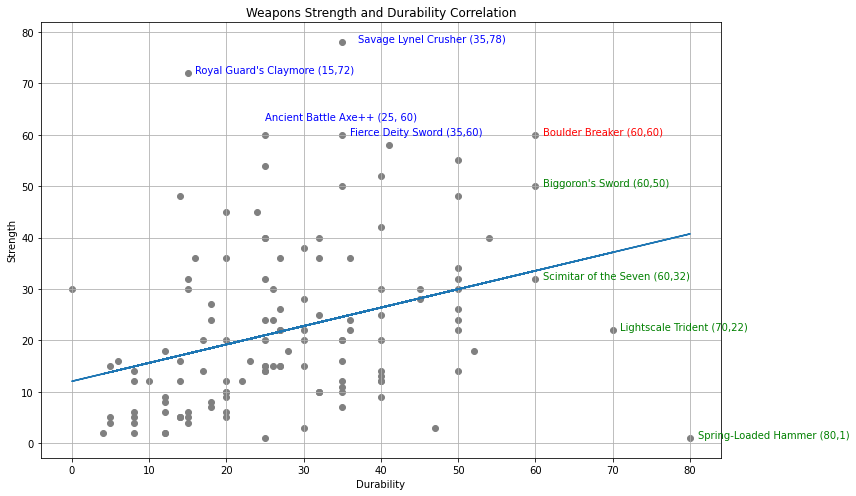

In [52]:

#weapon correlation between strength and durability 
fig1 = plt.figure(figsize=(12,7))
plt.scatter(weapons_df['durability'],weapons_df['strength'], color= "grey");
plt.title('Weapons Strength and Durability Correlation');
plt.xlabel('Durability');
plt.ylabel('Strength');
plt.grid();

#annotating durable weapons
plt.text(81,1,'Spring-Loaded Hammer (80,1)', horizontalalignment='left', color = 'green')
plt.text(71,22, 'Lightscale Trident (70,22)', horizontalalignment='left', color = 'green')
plt.text(61,32,'Scimitar of the Seven (60,32)', horizontalalignment='left', color = 'green')
plt.text(61,50,"Biggoron's Sword (60,50)", horizontalalignment='left', color = 'green')
plt.text(61,60,'Boulder Breaker (60,60)', horizontalalignment='left', color = 'red')
#annotating strong weapons
plt.text(37,78,'Savage Lynel Crusher (35,78)', horizontalalignment='left', color = 'blue')
plt.text(16,72,"Royal Guard's Claymore (15,72)", horizontalalignment= 'left', color = 'blue' )
plt.text(36,60,"Fierce Deity Sword (35,60)", horizontalalignment= 'left', color = 'blue' )
plt.text(25,63,"Ancient Battle Axe++ (25, 60)", horizontalalignment= 'left', color = 'blue' )
m, b = np.polyfit( weapons_df['durability'], weapons_df['strength'], 1)
plt.plot(weapons_df['durability'], m*(weapons_df['durability']) + b)
plt.plot();
fig1.tight_layout();
plt.savefig("../BotW/images/weapons_scatter.png")

In [53]:
#weapon durability data 
weapons_dur_data = weapons_df[["name",  "durability"]]
weapons_dur_data= weapons_dur_data.sort_values(by="durability", ascending=False)
weapons_dur_data = weapons_dur_data.head(10)
weapons_dur_data= weapons_dur_data.set_index('name')
weapons_dur_data

,durability
name,
Spring-Loaded Hammer,80.0
Lightscale Trident,70.0
Scimitar of the Seven,60.0
Biggoron's Sword,60.0
Boulder Breaker,60.0
Ancient Short Sword,54.0
Double Axe,52.0
Royal Halberd,50.0
Great Thunderblade,50.0


In [54]:
#weapon strength data 
weapons_str_data = weapons_df[["name", "strength"]]
weapons_str_data= weapons_str_data.sort_values(by="strength", ascending=False)
weapons_str_data= weapons_str_data.head(10)
weapons_str_data.set_index('name')
weapons_str_data= weapons_str_data.set_index('name')
weapons_str_data

,strength
name,
Savage Lynel Crusher,78.0
Royal Guard's Claymore,72.0
Fierce Deity Sword,60.0
Boulder Breaker,60.0
Ancient Battle Axe++,60.0
Savage Lynel Sword,58.0
Ancient Bladesaw,55.0
Mighty Lynel Crusher,54.0
Royal Claymore,52.0


## Shields Charts

In [55]:
#new shields data frame
shields_df = pd.DataFrame(shields)
shields_df = shields_df[['name', 'class', 'durability', 'strength', 'defense']]
shields_df

,name,class,durability,strength,defense
127,Ancient Shield,Shield,32.0,70.0,0.0
128,Boko Shield,Shield,5.0,3.0,0.0
129,Daybreaker,Shield,60.0,48.0,0.0
130,Dragonbone Boko Shield,Shield,8.0,25.0,0.0
131,Emblazoned Shield,Shield,12.0,3.0,0.0
132,Fisherman's Shield,Shield,10.0,3.0,0.0
133,Forest Dweller's Shield,Shield,18.0,30.0,0.0
134,Gerudo Shield,Shield,20.0,20.0,0.0
135,Guardian Shield,Shield,10.0,18.0,0.0
136,Guardian Shield+,Shield,13.0,30.0,0.0


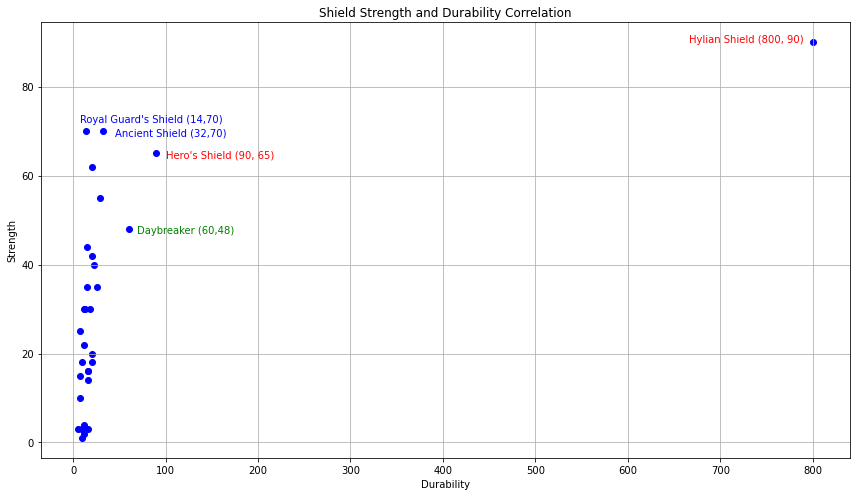

In [56]:
#shields correlation between strength and durability 
fig2 = plt.figure(figsize=(12,7))
plt.scatter( shields_df['durability'], shields_df['strength'] , color="blue")
plt.title('Shield Strength and Durability Correlation')
plt.xlabel('Durability')
plt.ylabel('Strength')
plt.grid()

#annotating durable shields
plt.text(790,90, 'Hylian Shield (800, 90)', horizontalalignment='right', color='red')
plt.text(100,64, "Hero's Shield (90, 65)", horizontalalignment='left', color='red')
plt.text(69,47,'Daybreaker (60,48)', horizontalalignment='left', color='green')

#annotating strong shields
plt.text(45,69,'Ancient Shield (32,70)', horizontalalignment='left',color="blue" )
plt.text(7,72,"Royal Guard's Shield (14,70)", horizontalalignment='left',color="blue")
plt.plot();
fig2.tight_layout();
plt.savefig("../BotW/images/shield_scatter.png")

In [57]:
#shield durability data 
shields_dur_df = shields_df[["name",  "durability"]]
shields_dur_df = shields_dur_df .sort_values(by="durability", ascending=False)
shields_dur_df = shields_dur_df .head(10)
shields_dur_df = shields_dur_df .set_index('name')
shields_dur_df 

,durability
name,
Hylian Shield,800.0
Hero's Shield,90.0
Daybreaker,60.0
Ancient Shield,32.0
Royal Shield,29.0
Radiant Shield,26.0
Knight's Shield,23.0
Gerudo Shield,20.0
Silver Shield,20.0


In [58]:
#shield strength data 
shields_str_df= shields_df[["name", "strength"]]
shields_str_df= shields_str_df.sort_values(by="strength", ascending=False)
shields_str_df.set_index('name')
shields_str_df= shields_str_df.head(10)
shields_str_df= shields_str_df.set_index('name')
shields_str_df

,strength
name,
Hylian Shield,90.0
Ancient Shield,70.0
Royal Guard's Shield,70.0
Hero's Shield,65.0
Savage Lynel Shield,62.0
Royal Shield,55.0
Daybreaker,48.0
Mighty Lynel Shield,44.0
Guardian Shield++,42.0


# Bow Charts

In [59]:
#bow data frame
bows_df = pd.DataFrame(bows)
bows_df = bows_df[['name', 'class', 'durability', 'strength', 'defense']]
bows_df

,name,class,durability,strength,defense
160,Ancient Bow,Bow,120.0,44.0,0.0
161,Boko Bow,Bow,16.0,4.0,0.0
162,Bow of Light,Bow,100.0,100.0,0.0
163,Dragon Bone Boko Bow,Bow,30.0,24.0,0.0
164,Duplex Bow,Bow,18.0,14.0,0.0
165,Falcon Bow,Bow,50.0,20.0,0.0
166,Forest Dweller's Bow,Bow,35.0,15.0,0.0
167,Golden Bow,Bow,60.0,14.0,0.0
168,Great Eagle Bow,Bow,60.0,28.0,0.0
169,Knight's Bow,Bow,48.0,26.0,0.0


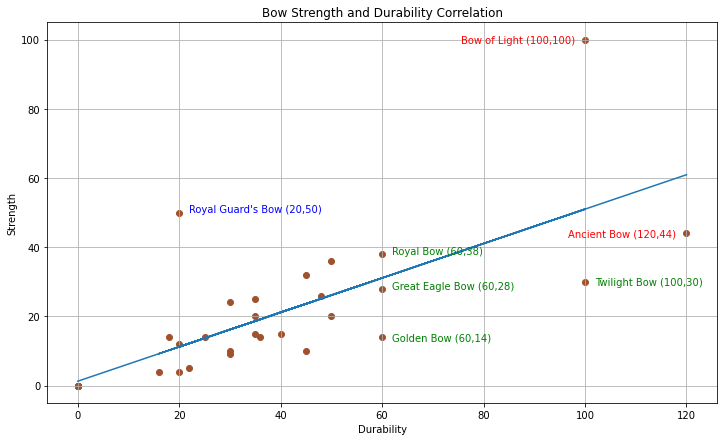

In [61]:
#bows correlation between strength and durability 
fig3 = plt.figure(figsize=(12,7))
plt.scatter(bows_df['durability'],bows_df['strength'], color="sienna")
plt.title('Bow Strength and Durability Correlation')
plt.xlabel('Durability')
plt.ylabel('Strength')
plt.grid()

#annotating durable bows
plt.text(118,43, 'Ancient Bow (120,44)', horizontalalignment='right', color='red')
plt.text(98,99, 'Bow of Light (100,100)', horizontalalignment='right', color='red')
plt.text(102,29, 'Twilight Bow (100,30)', horizontalalignment='left', color='green')
plt.text(62,13, 'Golden Bow (60,14)', horizontalalignment='left', color='green')
plt.text(62,38, 'Royal Bow (60,38)', horizontalalignment='left', color='green')
plt.text(62,28, 'Great Eagle Bow (60,28)', horizontalalignment='left', color='green')

#annotating strong bows
plt.text(22,50, "Royal Guard's Bow (20,50)", horizontalalignment='left', color='blue')

#regression line
m, b = np.polyfit( bows_df['durability'], bows_df['strength'], 1)
plt.plot(bows_df['durability'], m*(bows_df['durability']) + b)

plt.plot();
plt.savefig("../BotW/images/bows_scatter.png")

In [62]:
#bows durability data 
bows_dur_df = bows_df[["name",  "durability"]]
bows_dur_df = bows_dur_df .sort_values(by="durability", ascending=False)
bows_dur_df = bows_dur_df .head(10)
bows_dur_df = bows_dur_df .set_index('name')
bows_dur_df 

,durability
name,
Ancient Bow,120.0
Bow of Light,100.0
Twilight Bow,100.0
Golden Bow,60.0
Royal Bow,60.0
Great Eagle Bow,60.0
Steel Lizal Bow,50.0
Falcon Bow,50.0
Knight's Bow,48.0


In [63]:
#shield strength data 
bows_str_df= bows_df[["name","strength"]]
bows_str_df= bows_str_df.sort_values(by="strength", ascending=False)
bows_str_df= bows_str_df.head(10)
bows_str_df= bows_str_df.set_index('name')
bows_str_df

,strength
name,
Bow of Light,100.0
Royal Guard's Bow,50.0
Ancient Bow,44.0
Royal Bow,38.0
Steel Lizal Bow,36.0
Savage Lynel Bow,32.0
Twilight Bow,30.0
Great Eagle Bow,28.0
Knight's Bow,26.0


## Let's armor up!

In [64]:
amor_stuff = "Stuff-Grid view.csv"
stuff_file = pd.read_csv(amor_stuff)
armor_stuff_df = pd.DataFrame(stuff_file)
armor_stuff_df.head()

,name,class,subclass,tags,durability,strength,range,arrows,defense,defense_upgrade_lvl1,...,description,selling_price,bonus_set,upgrade_1,upgrade_2,upgrade_3,upgrade_4,armor_upgrade,where_to_find,notes
0,Ancient Short Sword,Weapon,Light,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,The blade of this sword was made using an anci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Blizzard Rod,Weapon,Light,NaN,32.0,10.0,NaN,NaN,NaN,NaN,...,A magical rod that can cast extreme cold in a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Boko Club,Weapon,Light,NaN,8.0,4.0,NaN,NaN,NaN,NaN,...,A crude Bokoblin club made to clobber small pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bokoblin Arm,Weapon,Light,NaN,5.0,5.0,NaN,NaN,NaN,NaN,...,A skeletal arm that keeps moving even after it...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boomerang,Weapon,Light,NaN,18.0,8.0,NaN,NaN,NaN,NaN,...,This throwing weapon was originally used by th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Remove unecessary columns
armor_stuff_df = armor_stuff_df.drop(columns=["tags", "durability", "strength", "range",
                    "arrows", "description", "selling_price","where_to_find","upgrade_1","upgrade_2","upgrade_3", 
                    "upgrade_4","armor_upgrade",
                    "where_to_find","notes"])
# stuff_df

In [66]:
armor_df = pd.DataFrame(armor_stuff_df.loc[armor_stuff_df["class"] == "Armor", :])

In [67]:
# Fills NaN's with 0 and Nones
armor_df['defense_upgrade_lvl4'] = armor_df['defense_upgrade_lvl4'].fillna(0)
armor_df[['bonus','bonus_set']] = armor_df[['bonus','bonus_set']].fillna("None")
armor_df = armor_df.set_index(["name"])

# CREATE TABLE FOCUSING ON BONUS SETS

In [68]:
bonus_set_df = pd.DataFrame(armor_df.reset_index())

In [69]:
bonus_set_df = bonus_set_df.drop(columns=["class","bonus"])

In [70]:
# bonus_set_df.set_index("bonus_set")
bonus_set_df = bonus_set_df.sort_values(by="bonus_set")

In [71]:
bonus_set_df = bonus_set_df.groupby("bonus_set").sum()
bonus_set_df = bonus_set_df.drop(index="None")

In [72]:
bonus_set_df = bonus_set_df.sort_values(by="defense_upgrade_lvl4", ascending=False)

In [73]:
bonus_set_df

,defense,defense_upgrade_lvl1,defense_upgrade_lvl2,defense_upgrade_lvl3,defense_upgrade_lvl4
bonus_set,,,,,
Master Sword Beam,57.0,96.0,156.0,234.0,384.0
Charge Attack Stamina,18.0,27.0,48.0,72.0,120.0
Ancient Proficiency,12.0,21.0,36.0,54.0,84.0
Climb Stamina,9.0,15.0,24.0,36.0,60.0
Disguise and Bone Attack,9.0,15.0,24.0,36.0,60.0
Fireproof,9.0,15.0,24.0,36.0,60.0
Shock Resist,9.0,15.0,24.0,36.0,60.0
Swim Dash Stamina,9.0,15.0,24.0,36.0,60.0
Unfreezable,9.0,15.0,24.0,36.0,60.0


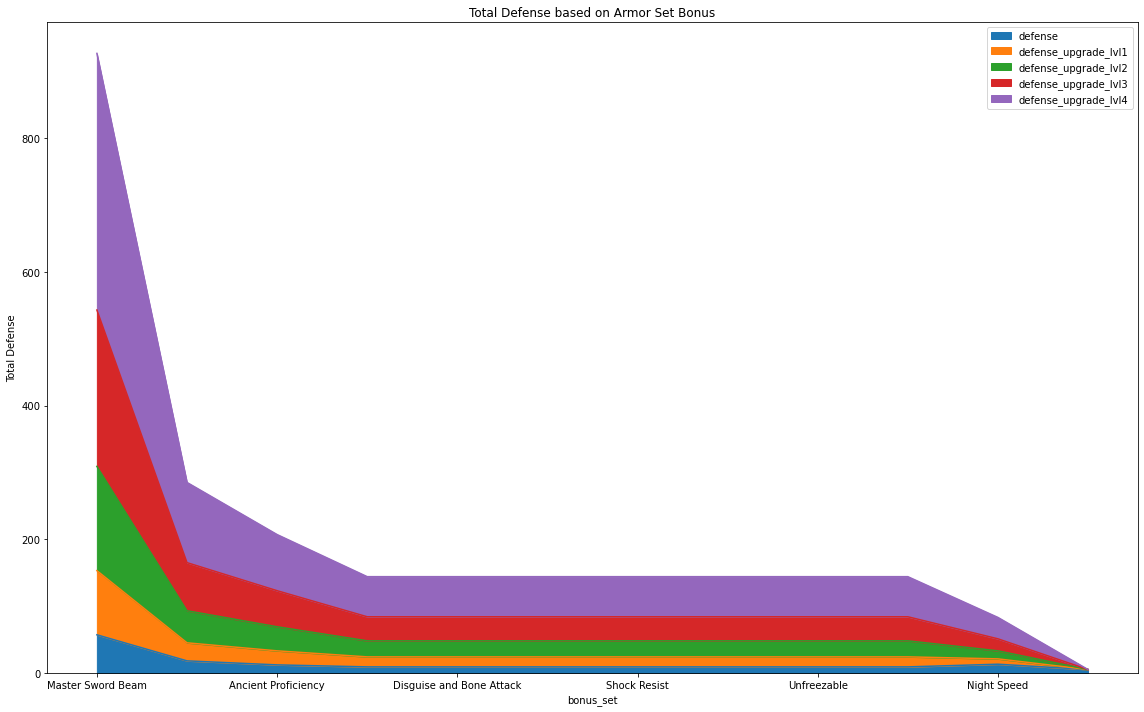

In [74]:
xticks= bonus_set_df.index.values
fig4, ax4 =  plt.subplots()
bonus_set_df.plot(kind="area", ax=ax4, figsize=(16,10));
ax4.set(ylabel="Total Defense", title="Total Defense based on Armor Set Bonus");
fig4.tight_layout();
plt.savefig("../BotW/images/armor_set_bonus.png")

# Monsters

In [77]:
# get foods and add to list
for i in monsters_json:
    
    # create a dictionary for monsters to create dataframe)
    monster_dict = {
        "name": i['name'],
        "id": i['id'],
    }
    
    # add dictionary to list
    monsters.append(monster_dict)

In [78]:
# create dataframe
monsters_df = monsters_df = pd.DataFrame(monsters).sort_values(by="name")

# sort alphabetically
monsters_df = monsters_df.drop_duplicates(subset=['id'], keep='first')

# set index
monsters_df = monsters_df.set_index("id")

# display dataframe
monsters_df

,name
id,
105,black bokoblin
149,black hinox
115,black lizalfos
110,black moblin
101,blizzrobe
...,...
161,waterblight ganon
123,white-maned lynel
162,windblight ganon


# Drops

In [79]:
# Iterate through json and check if the value that I represents is an empty list
# If it is set the drops variable to None otherwise append the drop information and create a DF
drops = []
for i in monsters_json:
    if i['drops'] == []:
        i['drops'] = None
    else:
        drops_dict = {
        "drops": i['drops'],
        "id": i['id'],
        }
    drops.append(drops_dict)
drops_df = pd.DataFrame(drops)

# transform each element into its own row in dataframe
drops_df = drops_df.explode('drops')

# display dataframe
#drops_df

In [80]:
# Re run code again to debug and obtain correct numbers
drops = []
for i in monsters_json:
    if i['drops'] == []:
        i['drops'] = None
    else:
        drops_dict = {
        "drops": i['drops'],
        "id": i['id'],
        }
    drops.append(drops_dict)
drops_df = pd.DataFrame(drops)

# transform each element into its own row in dataframe
drops_df = drops_df.explode('drops')

# display dataframe
drops_df

,drops,id
0,octorok tentacle,94
0,octo balloon,94
0,octorok eyeball,94
1,ancient screw,132
1,ancient spring,132
...,...,...
79,lynel hoof,123
79,lynel guts,123
80,lizalfos horn,114
80,lizalfos talon,114


In [81]:
# clean data by dropping Nan
drops_df = drops_df.dropna()
drops_df

,drops,id
0,octorok tentacle,94
0,octo balloon,94
0,octorok eyeball,94
1,ancient screw,132
1,ancient spring,132
...,...,...
79,lynel hoof,123
79,lynel guts,123
80,lizalfos horn,114
80,lizalfos talon,114


In [82]:
# groupby ID and count number of drops each monster has
drops_df = drops_df.groupby(['id'])['drops'].count()

# add it to dataframe
drops_df = pd.DataFrame(drops_df)

# display dataframe
drops_df

,drops
id,
84,1
85,1
86,1
87,1
88,2
89,2
90,2
91,2
92,3


In [83]:
# reset index for drops_df and monsters_df and merge the two dataframes
drops_df = drops_df.reset_index()
monsters_df = monsters_df.reset_index()

# merge drops_df and monsters_df dataframes
monsters_merged_df = pd.merge(monsters_df, drops_df, how="outer", on="id")
monsters_merged_df

,id,name,drops
0,105,black bokoblin,3.0
1,149,black hinox,9.0
2,115,black lizalfos,3.0
3,110,black moblin,3.0
4,101,blizzrobe,NaN
...,...,...,...
76,161,waterblight ganon,NaN
77,123,white-maned lynel,3.0
78,162,windblight ganon,NaN
79,135,yiga blademaster,6.0


In [84]:
# clean data by dropping Nan
monsters_merged_df = monsters_merged_df.dropna()
#monsters_merged_df

In [85]:
# rename columns
monsters_merged_df.columns = ["ID", "Monster Name", "Drop Count"]
monsters_merged_df

,ID,Monster Name,Drop Count
0,105,black bokoblin,3.0
1,149,black hinox,9.0
2,115,black lizalfos,3.0
3,110,black moblin,3.0
5,104,blue bokoblin,3.0
6,148,blue hinox,12.0
7,114,blue lizalfos,3.0
8,109,blue moblin,3.0
9,122,blue-maned lynel,3.0
10,103,bokoblin,2.0


In [86]:
# create new column for species in the monsters_merged_df dataframe
monsters_merged_df["Species"] = ""
monsters_merged_df

<ipython-input-86-b400f8667a13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monsters_merged_df["Species"] = ""


,ID,Monster Name,Drop Count,Species
0,105,black bokoblin,3.0,
1,149,black hinox,9.0,
2,115,black lizalfos,3.0,
3,110,black moblin,3.0,
5,104,blue bokoblin,3.0,
6,148,blue hinox,12.0,
7,114,blue lizalfos,3.0,
8,109,blue moblin,3.0,
9,122,blue-maned lynel,3.0,
10,103,bokoblin,2.0,


In [87]:
# update dataframe by adding Species to each monster
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("koblin")] = "bokoblin"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("nox")] = "hinox"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("lizalfos")] = "lizalfos"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("moblin")] = "moblin"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("lynel")] = "lynel"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("chuchu")] = "chuchu"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("keese")] = "keese"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("robe")] = "wizzrobe"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("talus")] = "talus"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("octorok")] = "octorok"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("ganon")] = "ganon"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("pebblit")] = "talus"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("master kohga")] = "yiga clan"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("yiga")] = "yiga clan"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("koshia")] = "sheikah"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("dinraal")] = "dragon"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("naydra")] = "dragon"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("farosh")] = "dragon"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("guardian")] = "guardian scout"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("moldu")] = "moldugas"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("sentry")] = "guardian"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("stalker")] = "guardian"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("skywatcher")] = "guardian"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("turret")] = "guardian"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("decayed")] = "guardian"
monsters_merged_df

<ipython-input-87-3673f7a57955>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("koblin")] = "bokoblin"
C:\Users\Ronca\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-87-3673f7a57955>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monsters_merged_df[

,ID,Monster Name,Drop Count,Species
0,105,black bokoblin,3.0,bokoblin
1,149,black hinox,9.0,hinox
2,115,black lizalfos,3.0,lizalfos
3,110,black moblin,3.0,moblin
5,104,blue bokoblin,3.0,bokoblin
6,148,blue hinox,12.0,hinox
7,114,blue lizalfos,3.0,lizalfos
8,109,blue moblin,3.0,moblin
9,122,blue-maned lynel,3.0,lynel
10,103,bokoblin,2.0,bokoblin


In [88]:
# clean dataframe by reordering columns
monsters_merged_df = monsters_merged_df[["ID", "Species", "Monster Name", "Drop Count"]]
monsters_merged_df

,ID,Species,Monster Name,Drop Count
0,105,bokoblin,black bokoblin,3.0
1,149,hinox,black hinox,9.0
2,115,lizalfos,black lizalfos,3.0
3,110,moblin,black moblin,3.0
5,104,bokoblin,blue bokoblin,3.0
6,148,hinox,blue hinox,12.0
7,114,lizalfos,blue lizalfos,3.0
8,109,moblin,blue moblin,3.0
9,122,lynel,blue-maned lynel,3.0
10,103,bokoblin,bokoblin,2.0


In [89]:
# format dataframe by capitalizing the first letter in each word
monsters_merged_df["Species"]= monsters_merged_df["Species"].str.title()
monsters_merged_df["Monster Name"]= monsters_merged_df["Monster Name"].str.title()

In [90]:
# sort by species and ID
monsters_merged_df = monsters_merged_df.sort_values(by=["Species", "ID"], ascending=True)
# Save new DataFrame to csv file
monsters_merged_df.to_csv("BotW_Monsters.csv", index=False)
monsters_merged_df

,ID,Species,Monster Name,Drop Count
10,103,Bokoblin,Bokoblin,2.0
5,104,Bokoblin,Blue Bokoblin,3.0
0,105,Bokoblin,Black Bokoblin,3.0
65,106,Bokoblin,Stalkoblin,2.0
59,107,Bokoblin,Silver Bokoblin,9.0
12,84,Chuchu,Chuchu,1.0
24,85,Chuchu,Fire Chuchu,1.0
40,86,Chuchu,Ice Chuchu,1.0
19,87,Chuchu,Electric Chuchu,1.0
37,125,Guardian,Guardian Stalker,6.0


## Monster Observation

In [91]:
# analyze mode by monster to determine frequency
monster_quantity = monsters_merged_df.groupby(['Species'])["Monster Name"].count()
monsters_quantity_df = pd.DataFrame(monster_quantity).sort_values(by=["Monster Name"], ascending=False)
monsters_quantity_df = monsters_quantity_df.reset_index()

#rename columns
monsters_quantity_df.columns = ["Species", "Quantity"]

#display
monsters_quantity_df

,Species,Quantity
0,Lizalfos,8
1,Talus,8
2,Bokoblin,5
3,Guardian,5
4,Moblin,5
5,Octorok,5
6,Chuchu,4
7,Guardian Scout,4
8,Hinox,4
9,Keese,4


In [92]:
# analyze drop count by species
species_drop_sum = monsters_merged_df.groupby(['Species'])['Drop Count'].sum()
species_df = pd.DataFrame(species_drop_sum).sort_values(by=["Drop Count"], ascending=False)
species_df.reset_index()

# display
species_df

,Drop Count
Species,
Talus,34.0
Hinox,32.0
Lizalfos,28.0
Guardian,27.0
Octorok,20.0
Bokoblin,19.0
Moblin,19.0
Lynel,17.0
Guardian Scout,16.0


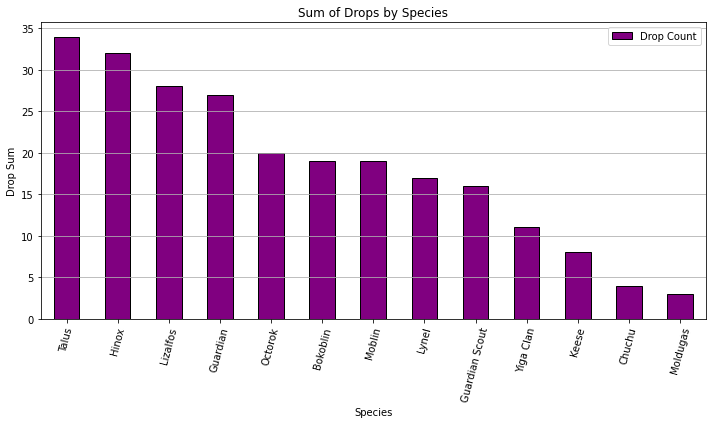

In [94]:
# plot bar chart of species and sum of drops
fig5, ax5 = plt.subplots()
species_df.plot(kind="bar", figsize=(10,6), ax=ax5, color="purple", edgecolor="black",
                  title="Sum of Drops by Species",
                  xlabel="Species",
                  ylabel="Drop Sum");
plt.xticks(rotation = 75)
ax5.yaxis.grid()
fig5.tight_layout();

# save figure
plt.savefig("../BotW/images/Number of Drops by Species.png")

Monster Species Analysis
* The chart above shows us the sum of drops by each species of monster
* Rounding out the top 3 is the Talus with 34, Hinox with 32 and Lizalfos with 28
* These species of monsters in general will produce more drops, therefore, fighting any of the monsters within that species will yield a higher reward
* As the sum for each species increase, you will need to defeat less of these monsters if you are looking to add to your inventory
* As the sum for each species decrease, you will need to defeat more of these monsters if you are looking to add to your inventory

In [95]:
# analyze drop count by name
monster_drop_count = monsters_merged_df.groupby(['Monster Name'])["Drop Count"].sum()
monster_drop_count_df = pd.DataFrame(monster_drop_count).sort_values(by=["Drop Count"], ascending=False)
monster_drop_count_df.reset_index()

# display
monster_drop_count_df.head(10)

,Drop Count
Monster Name,
Blue Hinox,12.0
Hinox,10.0
Silver Lizalfos,9.0
Silver Bokoblin,9.0
Silver Moblin,9.0
Black Hinox,9.0
Treasure Octorok,8.0
Silver Lynel,8.0
Stone Talus (Rare),7.0


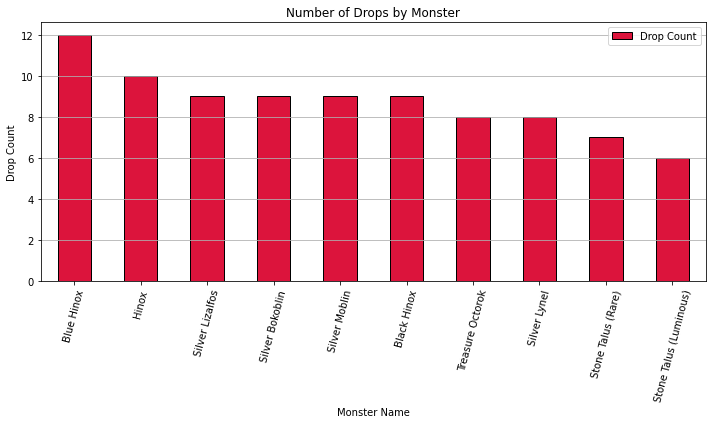

In [96]:
# plot bar chart of top 10 monster by drop total
fig6, ax6 = plt.subplots()
monster_drop_count_df.head(10).plot(kind="bar", figsize=(10,6), ax=ax6, color="crimson", edgecolor="black",
                  title="Number of Drops by Monster",
                  xlabel="Monster Name",
                  ylabel="Drop Count");
plt.xticks(rotation=75)
ax6.yaxis.grid()
fig6.tight_layout();

# save figure
plt.savefig("../BotW/images/Number of Drops by Monster.png")

In [97]:
average = monster_drop_count_df['Drop Count'].mean()
std = monster_drop_count_df['Drop Count'].std()
print(f"The average drop of a monster is {round(average,2)}")
print(f"The standard deviation of all monster drops is {round(std,2)}")
print(f"{round(average - std,2)}")

The average drop of a monster is 3.97
The standard deviation of all monster drops is 2.56
1.41


Monster Drop Analysis
* The chart above shows us the number of drops by each individual monster
* Rounding out the top 5 is the Blue Hinox with 12, Hinox with 10, and the Silver Lizalfos, Silver Bokoblin and Silver Moblin with 9 each
* These monsters will produce more drops after defeat which provides more value to your inventory when collecting items
* It is likely that the higher the drops, the more difficult the enemy is. More information is needed to prove this analysis
* Additionally, we can use basic statistics to form a stronger analysis. 
    * The average number of drops each monster produces is 3.966. How accurate is this? We use the standard deviation to measure how far away this average deviates from the true value.
    * The standard deviation of monster drops is 2.557. What does 2.557 tell us? 
    * A strong standard deviation is within ±2 of the average. Take the difference of our two values and we get 1.409, which is less than 2.
    * We can confidently say that a monster with drop counts greater than 4 (above average) will yield a higher reward/add more value to your inventory.

# Get materials and foods list

In [98]:
# get materials and add to list
for i in materials_json:
    # create a dictionary for materials to create DataFrame)
    material_dict = {
        "name": i['name'],
        "hearts_recovered": i['hearts_recovered'],
        "cooking_effect": i['cooking_effect'],
    }
     # add dictionary to list.
    materials.append(material_dict)

In [99]:
# Create DataFrame from dictionary
materials_df = pd.DataFrame(materials)

In [100]:
# add a 'none' to the cooking_effect that show a blank
materials_df["cooking_effect"] = ['none' if x == '' else x for x in materials_df['cooking_effect']]

In [101]:
# Preivew DataFrame
#materials_df

In [102]:
# save to .csv file
materials_df.to_csv("BotW_material_stats.csv", index=False)

In [103]:
# # union materials df and foods df into a new DataFrame
# consumables_df = pd.concat([materials_df, foods_df]).reset_index(drop=True)

In [104]:
# consumables_df = consumables_df.sort_values(by="hearts_recovered", ascending=False)

In [105]:
# # Save consumables to a csv file
# consumables_df.to_csv("BotW_consumables.csv", index=False)

# Let's get cooking!

In [106]:
# get foods and add to list
for i in creatures_json:
    # create a dictionary for foods to create DataFrame)
    food_dict = {
        "name": i['name'],
        "hearts_recovered": i['hearts_recovered'],
        "cooking_effect": i['cooking_effect'],
    }
    # add dictionary to list.
    foods.append(food_dict)

In [107]:
# Create DataFrame
# add a 'none' to the foods that show a blank
foods_df = pd.DataFrame(foods).sort_values(by="name")
foods_df["cooking_effect"] = ['none' if x == '' else x for x in foods_df['cooking_effect']]

In [108]:
# save to .csv file
foods_df.to_csv("BotW_food_stats.csv", index=False)

In [109]:
# union materials df and foods df into a new DataFrame
consumables_df = pd.concat([materials_df, foods_df]).reset_index(drop=True)

In [110]:
consumables_df = consumables_df.sort_values(by="hearts_recovered", ascending=False)

In [111]:
# Save consumables to a csv file
consumables_df.to_csv("BotW_consumables.csv", index=False)

## Hearts help you stay alive
## These tasty ingredients grant you hearts

In [112]:
# obtain consumables DF
consumables_df
# create hearts Df for barchart
hearts_df = pd.DataFrame(consumables_df)
# drop the items that do not give you hearts
hearts_df = hearts_df[hearts_df['hearts_recovered'] !=0]
hearts_df = hearts_df.sort_values(by="hearts_recovered", ascending=True)
# set variables to hold name and


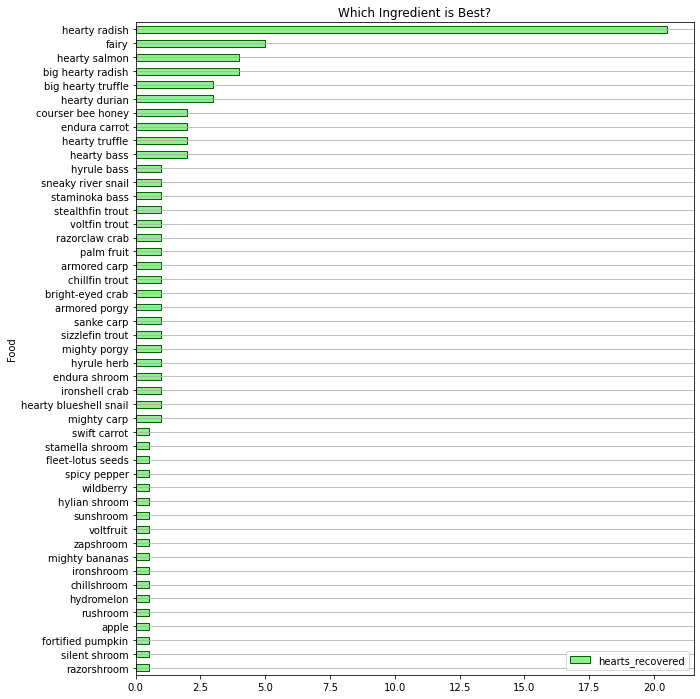

In [113]:
fig7, ax7 = plt.subplots()
hearts_df.plot(kind="barh", x="name", y ="hearts_recovered",figsize=(10,12), ax=ax7, edgecolor='darkgreen',color='lightgreen',
                  title="Which Ingredient is Best?",
                  xlabel="Food",
                  ylabel="Hearts Given");
ax7.yaxis.grid()
plt.savefig("../BotW/images/Ingredients.png")

## Cooked meals grant extra hearts and bonus effects

In [114]:
# Create DataFrame for cooking effects
cooking_df = pd.DataFrame(consumables_df)
# remove those that don't give a cooking effect
cooking_df

,name,hearts_recovered,cooking_effect
1,hearty radish,20.5,extra hearts
44,fairy,5.0,none
49,hearty salmon,4.0,extra hearts
27,big hearty radish,4.0,extra hearts
28,big hearty truffle,3.0,extra hearts
...,...,...,...
48,hearty lizard,0.0,extra hearts
16,silent princess,0.0,stealth up
17,armoranth,0.0,defense up
45,fireproof lizard,0.0,flame guard


there are a total of 9 different types of consumales that give you extra hearts
this is good for survival and very beneficial for cooking!


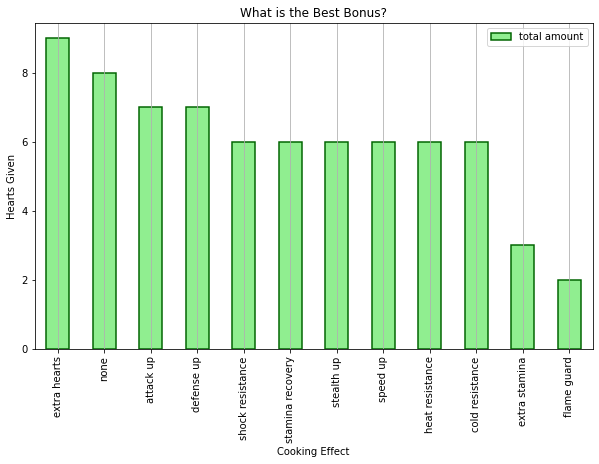

In [115]:
# Create a bar chart to capture the value counts of each cooking effect
fig8, ax8 = plt.subplots()
x = cooking_df['cooking_effect'].unique()
y = cooking_df['cooking_effect'].value_counts()
# create a new df to hold the value counts of each cooking effect
effect_count_df = pd.DataFrame({"cooking_effect":x, "total amount":y})
effect_count_df.plot(kind="bar",figsize=(10,6), ax=ax8, linewidth='1.5', edgecolor='darkgreen',color='lightgreen', 
                  title="What is the Best Bonus?",
                  xlabel="Cooking Effect",
                  ylabel="Hearts Given");
print(f"there are a total of {cooking_df['cooking_effect'].value_counts().max()} different types of consumales that give you extra hearts")
print("this is good for survival and very beneficial for cooking!")
ax8.xaxis.grid()
plt.savefig("../BotW/images/cooking_bonus.png")

In [116]:
#Call food data from second source
food_grid =("Food-Grid view.csv")
food_grid_df = pd.read_csv(food_grid)
#clear unecessary columns
Food_Grid_df=food_grid_df.drop(columns=['class', 'subclass', 'description', 'ingredients', 'effect']).dropna()
#Food_Grid_df

In [117]:
#Manipulate Data to suit our needs 
FoodGrid_df = Food_Grid_df[["hp", "name"]]
Food_Grid_df.reset_index(drop=True, inplace=True)
FoodGrid_df=FoodGrid_df.sort_values(by="hp", ascending=True)
FoodGrid_df=FoodGrid_df.set_index("name")
FoodGrid_df

,hp
name,
Roasted Armoranth,0.50
Roasted Acorn,0.50
Roasted Tree Nut,0.50
Roasted Mighty Thistle,0.50
Toasty Zapshroom,0.75
...,...
Seared Gourmet Steak,4.50
Roasted Whole Bird,4.50
Blueshell Escargot,4.50


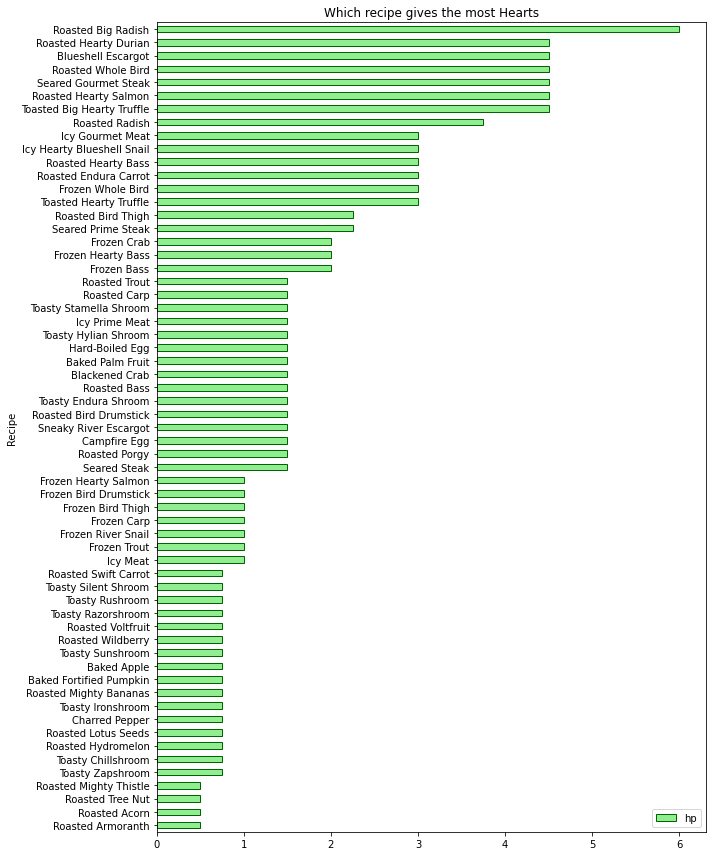

In [118]:
#Show info in graph form
fig9, ax9 = plt.subplots()
FoodGrid_df.plot(kind="barh", figsize=(10,12), ax=ax9, edgecolor='darkgreen',color='lightgreen',
                  title="Which recipe gives the most Hearts",
                  xlabel="Recipe",
                  ylabel="Hearts Gained");
fig9.tight_layout();
plt.savefig("../BotW/images/Recipe_bar.png")

In [119]:
#Isolate Elixirs
Elixirs = food_grid_df[food_grid_df["name"].str.contains("Elixir")]
Elixirs=Elixirs.drop(columns=["class","hp"])
Elixirs
# save to .csv file
Elixirs.to_csv("Elixirs.csv", index=False)
Elixirs

,name,subclass,description,ingredients,effect
0,Tough Elixir,Elixir,"Grants a X-level toughness effect, which forti...",Rugged Rhino Beetle,Tough
1,Spicy Elixir,Elixir,"Warms your body from its core, increasing your...","Summerwing Butterfly,Warm Darner",Spicy
2,Sneaky Elixir,Elixir,"Grants a X-level stealth effect, which calms t...",Sunset Firefly,Sneaky
3,Mighty Elixir,Elixir,"Grants a might effect, which strengthens your ...","Bladed Rhino Beetle,Mighty Bananas,Monster Part",Mighty
4,Hearty Elixir,Elixir,Restores you to full health and increases your...,Hearty Lizard,Hearty
5,Hasty Elixir,Elixir,"Grants a X-level haste effect, which boosts yo...","Hightail Lizard,Hot-Footed Frog",Hasty
6,Fireproof Elixir,Elixir,"Grants a fireproof effect, which prevents your...","Fireproof Lizard,Smotherwing Butterfly",Fireproof
7,Energizing Elixir,Elixir,"Restores your Stamina, which is used when perf...","Restless Cricket,Energetic Rhino Beetle",Energizing
8,Enduring Elixir,Elixir,Restores stamina and temporarily extends your ...,Tireless Frog,Enduring
9,Electro Elixir,Elixir,Grants a X-level resistance to electricity. Us...,"Thunderwing Butterfly,Electric Darner",Electro


In [120]:
import dataframe_image as dfi
Elixirs_df = pd.DataFrame(Elixirs)
dfi.export(Elixirs_df, '../BotW/images/Elixirs.png')